# Pipeline

We are now looking into the use of `Pipeline`s

In [1]:
%load_ext autoreload
%autoreload 2
    
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from pydatatom import *

%matplotlib ipympl

In [2]:
raw_dataset = GzipPickleDataset("/tmp/AA_clock_spect")
len(raw_dataset)

2470

In [3]:
prob_pipeline = Pipeline(steps=[
    TransformStep(PickKey("image")),
    ImageMeanStep(),
    AtomCropStep(atom_num=16),
    AtomCountStep(),
    AtomStatsStep(),
])
prob_pipeline.fit(raw_dataset)

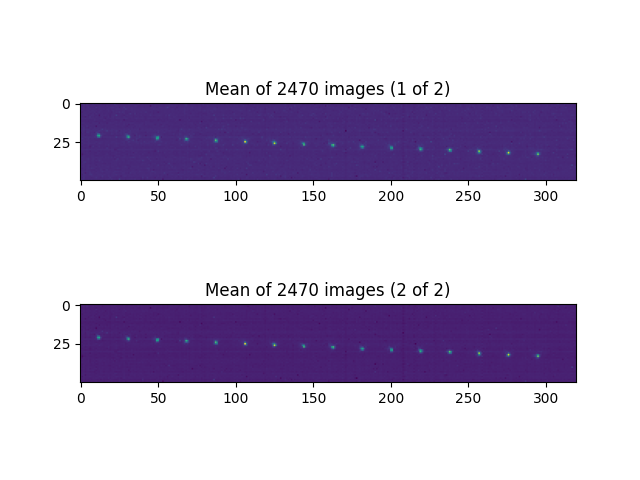

In [4]:
prob_pipeline.plot_step(1)

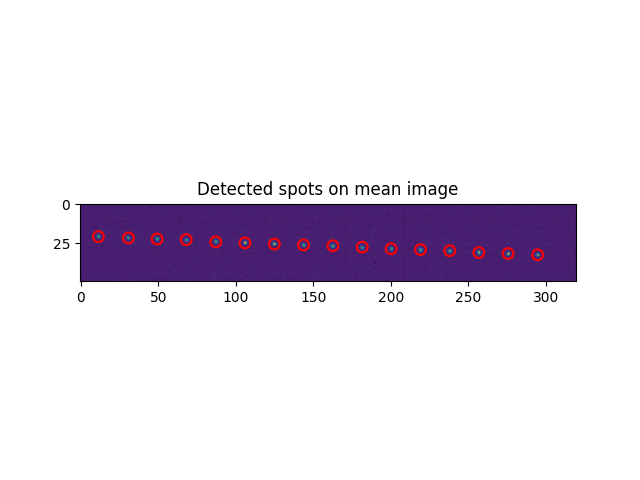

In [5]:
prob_pipeline.plot_step(2)

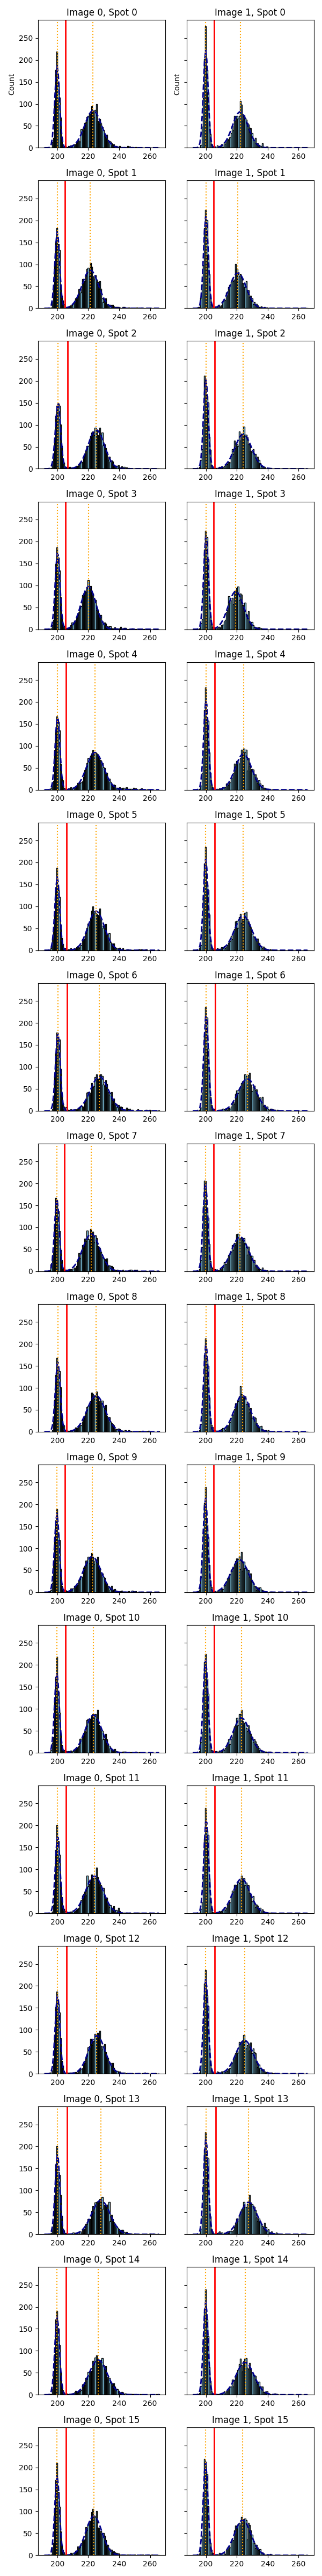

In [7]:
prob_pipeline.plot_step(3)

In [8]:
prob_dataset = prob_pipeline.transform(raw_dataset)

dataset = Combine(raw_dataset, prob_dataset, 'probability')
dataset = Transform(dataset, DropKeys("image"))

In [9]:
df = pd.DataFrame(list(dataset))
df.head()

,im_num,run,TC_systime_sec,f_blue_big_sideband,f_blue_IMG_AOM,f_2DMOT_AOM,amp_2DMOT_AOM,f_xSlower_AOM,f_ZS_AOM,amp_ZS_AOM,...,cam_gainRange,cam_gain,cam_id,cam_available_im_modes,cam_exposure,cam_imaging_mode,cam_triggerMode,cam__gotImage,crop,probability
0,521,11260.0,8.714378e+13,478.0,385.0,354.0,0.74,304.0,115.0,1.0,...,"[0, 0]",0,None,"[Single, Take3, Take2]",0.025,Take2,1,True,"[1235, 1555, 720, 770]",0.6923076923076923
1,1864,12603.0,8.816362e+13,478.0,385.0,354.0,0.74,304.0,115.0,1.0,...,"[0, 0]",0,None,"[Single, Take3, Take2]",0.025,Take2,1,True,"[1235, 1555, 720, 770]",0.0
2,1767,12506.0,8.809019e+13,478.0,385.0,354.0,0.74,304.0,115.0,1.0,...,"[0, 0]",0,None,"[Single, Take3, Take2]",0.025,Take2,1,True,"[1235, 1555, 720, 770]",0.0
3,1627,12366.0,8.798405e+13,478.0,385.0,354.0,0.74,304.0,115.0,1.0,...,"[0, 0]",0,None,"[Single, Take3, Take2]",0.025,Take2,1,True,"[1235, 1555, 720, 770]",0.8181818181818182
4,461,11200.0,8.709818e+13,478.0,385.0,354.0,0.74,304.0,115.0,1.0,...,"[0, 0]",0,None,"[Single, Take3, Take2]",0.025,Take2,1,True,"[1235, 1555, 720, 770]",1.0
